## Something on my birthday, using US birth data, to find out American Babies Hate Weekends ##

I read an article written by **Ravi Charan** in **Towards Data Science** that discussed the uniform birthday problem and created a model to understand the variations in birth https://towardsdatascience.com/how-popular-is-your-birthday-91ab133f7fc4] .
Thought the article was interesting I did not think the content of the article was really answering the question raised in the title **"How Popular is your Birthday"**, as in "How Popular is **MY** Birthday" **:)** So I set out to get the data https://github.com/fivethirtyeight/data/tree/master/births] and look into it.
This is the (granular) story...

### 1. The Tools ###

In [203]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image 
import datetime
from datetime import date
import calendar
import seaborn as sns

### 2. The Data ###
This is the description of the data provided on github. The title of the original article written by **Carl Bialik** "Some people are too superstitious to have a baby on friday the 13th" amused me because my 13th birthday was a Friday and I was born at 13h00. [https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/]

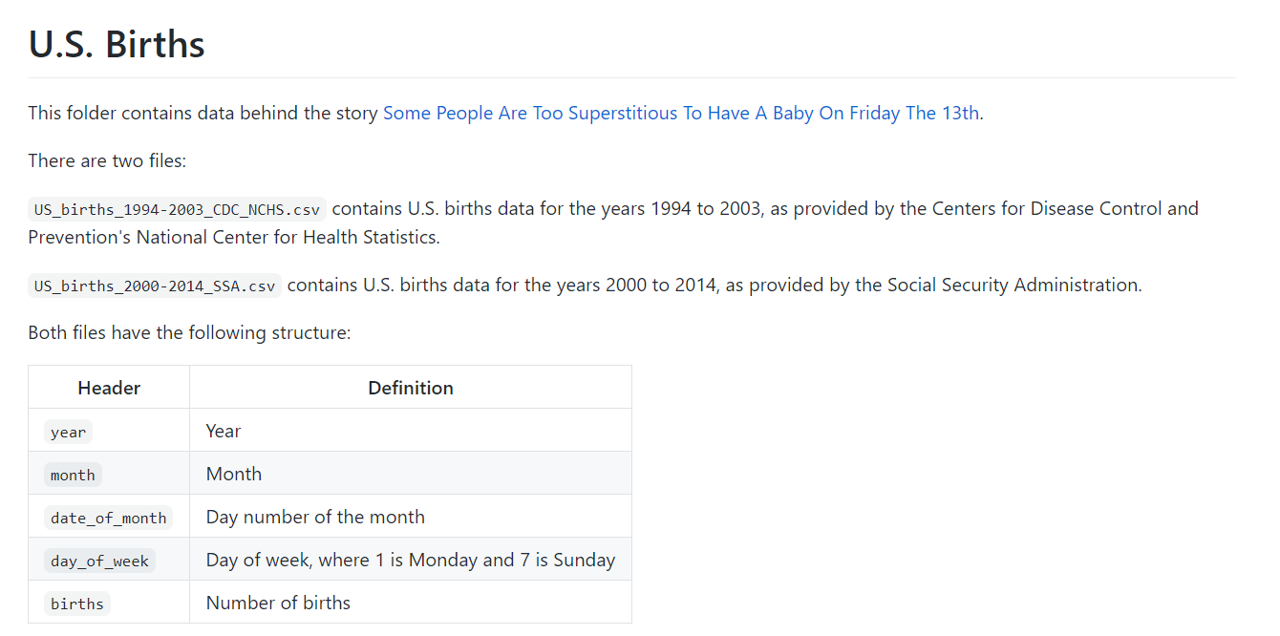

In [204]:
Image(filename = "data_origin.png")

In [205]:
### import the datasets
### C:\Users\Anne\Documents\GIT\TheFoxerine\DataStory_Births
births_94_03 = pd.read_csv("US_births_1994-2003_CDC_NCHS.txt")
births_04_14 = pd.read_csv("US_births_2000-2014_SSA.txt")

In [206]:
### dataframe showing births from 1994 to 2003
births_94_03.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [207]:
### dataframe showing births from 2000 to 2014
births_04_14.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [208]:
### drop 2000 to 2003 data in births_94_03
births_94_99 = births_94_03[births_94_03['year'].isin([1994,1995,1996,1997,1998,1999])]

In [209]:
### concatenate both dataframes
births=pd.concat([births_04_14,births_94_99], ignore_index=True)
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7670 non-null   int64
 1   month          7670 non-null   int64
 2   date_of_month  7670 non-null   int64
 3   day_of_week    7670 non-null   int64
 4   births         7670 non-null   int64
dtypes: int64(5)
memory usage: 299.7 KB


In [210]:
### Fix dates
births.rename(columns={'date_of_month':'day'}, inplace=True)
births['date'] = pd.to_datetime(births[['year', 'month', 'day']])
pd.to_datetime(births.year, format = "%Y")
births['day_of_week'] = pd.to_datetime(births.day_of_week, format="%d")
births['day_name'] = births['day_of_week'].dt.day_name()

In [211]:
### Set date to index
births.set_index(births.date, inplace=True)

In [212]:
### Looks ok, can't complain
births.head()

,year,month,day,day_of_week,births,date,day_name
date,,,,,,,
2000-01-01,2000,1,1,1900-01-06,9083,2000-01-01,Saturday
2000-01-02,2000,1,2,1900-01-07,8006,2000-01-02,Sunday
2000-01-03,2000,1,3,1900-01-01,11363,2000-01-03,Monday
2000-01-04,2000,1,4,1900-01-02,13032,2000-01-04,Tuesday
2000-01-05,2000,1,5,1900-01-03,12558,2000-01-05,Wednesday


### 3. The Story ###
Birth may happen naturally or can be induced for practical or medical reasons.  According to the CDC the current rate of induction is 23% and "Trends in induction rates vary by gestational age, with rates for most gestational age groups declining since 2010. " [https://www.cdc.gov/nchs/products/databriefs/db155.htm] In other words there is no need to bother looking at births happening around major holidays because the rate of induction suggests it is not a discrete practice.
My questions are:
- which birthday has the most births? the least birth? 
- is it consistent throughout the years (1994-2014)?
- where does my birthday (03/13) stand?
- how many kids have celebrated or will celebrate their 13th birthday on a Friday? (like I did)

First let's look at the bulk data to see what it is made of:

In [213]:
### Establish a baseline by looking at the evolution of total birth from 1999-2014
total_births_per_year = births.groupby(['year']).sum()
total_births_per_year.reset_index(inplace=True)
total_births_per_year['births'] = total_births_per_year.births/1000000

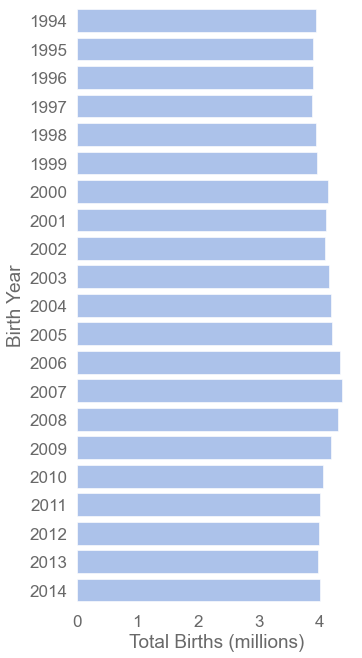

In [214]:
### Plot total births per year
fig0, ax = plt.subplots(figsize=(5,11))
sns.set_theme(style="white")
sns.despine(fig=fig0, left=True, bottom=True)
sns.barplot(x="births", y="year", data=total_births_per_year, ax=ax, orient= 'h', color='cornflowerblue', alpha=0.6)
plt.ylabel('Birth Year', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.xaxis.label.set_color('dimgrey')
ax.tick_params(axis='x', color='dimgrey')
plt.grid(False)
plt.setp(ax.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax.get_yticklabels(), size=17, color='dimgrey');
fig0.savefig('births_peryear.jpeg', transparent = True, bbox_inches = 'tight')

In [215]:
total_births_per_year.describe()

,year,month,day,births
count,21.000000,21.000000,21.000000,21.000000
mean,2004.000000,2382.476190,5744.904762,4.081559
std,6.204837,0.872872,12.656638,0.149832
min,1994.000000,2382.000000,5738.000000,3.880894
25%,1999.000000,2382.000000,5738.000000,3.959417
50%,2004.000000,2382.000000,5738.000000,4.055975
75%,2009.000000,2382.000000,5738.000000,4.186863
max,2014.000000,2384.000000,5767.000000,4.380784


In [216]:
total_births_per_year.births.sum()

85.712738

There is an average of 4.1 million births in the U.S. each year from 1994 to 2014, ranging from 3.88 to 4.38 millions. This makes a total of 85.71 million babies born in the U.S. between 1994 and 2014. All in all there is not a huge variation of the total births throughout the years. 

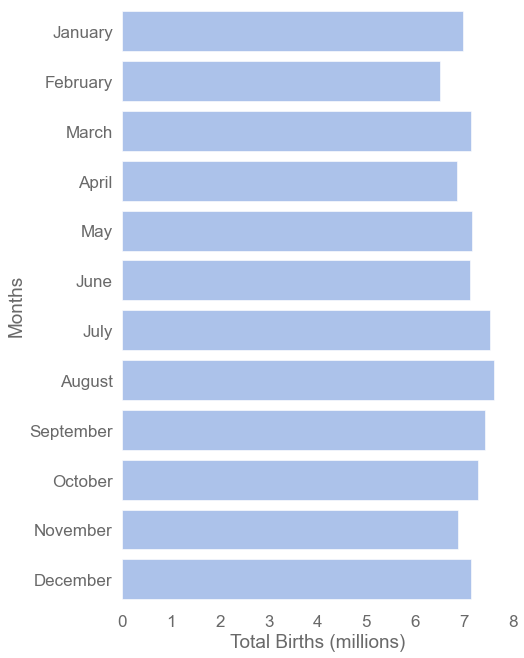

In [217]:
### Plot total births per day of the week
total_births_per_month = births.groupby(['month']).sum()
total_births_per_month.reset_index(inplace=True)
total_births_per_month['births'] = total_births_per_month.births/1000000
months_in_order=['January', 'February','March','April','May','June','July','August','September','October','November','December']
total_births_per_month = total_births_per_month.sort_values('month')

fig01, ax01 = plt.subplots(figsize=(7,11))
sns.set_theme(style="white")
sns.despine(fig=fig01, left=True, bottom=True)
sns.barplot(x="births", y="month", data=total_births_per_month, ax=ax01, orient= 'h', color='cornflowerblue', alpha=0.6)
plt.ylabel('Months', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax01.xaxis.label.set_color('dimgrey')
ax01.tick_params(axis='x', color='dimgrey')
ax01.set_yticklabels(months_in_order, fontsize=17, color='dimgrey', rotation=0)
plt.grid(False)
plt.setp(ax01.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax01.get_yticklabels(), size=17, color='dimgrey');
fig01.savefig('births_permonth.jpeg', transparent = True, bbox_inches = 'tight')

In [218]:
total_births_per_month.describe()

,month,year,day,births
count,12.000000,1.200000e+01,12.000000,12.000000
mean,6.500000,1.280890e+06,10053.583333,7.142728
std,3.605551,3.547840e+04,536.324098,0.311938
min,1.000000,1.188372e+06,8671.000000,6.511697
25%,3.750000,1.262520e+06,9765.000000,6.955535
50%,6.500000,1.304604e+06,10416.000000,7.151235
75%,9.250000,1.304604e+06,10416.000000,7.330531
max,12.000000,1.304604e+06,10416.000000,7.624626


The distribution of births within months does not show much variation. It tends to reflect the number of days that contains each months i.e. months with 31 days tends to dominate, except September which bears more births than October.

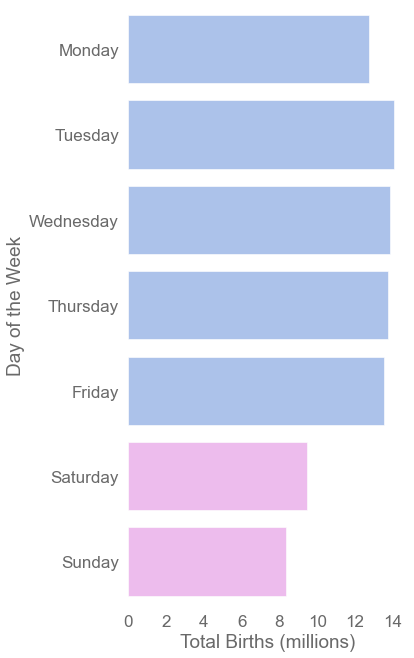

In [219]:
### Plot total births per day of the week
total_births_per_day = births.groupby(['day_name']).sum()
total_births_per_day.reset_index(inplace=True)
total_births_per_day['births'] = total_births_per_day.births/1000000
days_in_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_births_per_day['day_name'] = pd.Categorical(total_births_per_day['day_name'], categories=days_in_order, ordered=True)
total_births_per_day = total_births_per_day.sort_values('day_name')
fig00, ax00 = plt.subplots(figsize=(5,11))
sns.set_theme(style="white")
sns.despine(fig=fig00, left=True, bottom=True)
sns.barplot(x="births", y="day_name", data=total_births_per_day, ax=ax00, orient= 'h', alpha=0.6,
           palette=['cornflowerblue' if x in ['Monday','Tuesday','Wednesday','Thursday', 'Friday'] else 'violet' for x in total_births_per_day.day_name])
plt.ylabel('Day of the Week', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax00.xaxis.label.set_color('dimgrey')
ax00.tick_params(axis='x', color='dimgrey')
plt.grid(False)
plt.setp(ax00.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax00.get_yticklabels(), size=17, color='dimgrey');
fig00.savefig('births_perday.jpeg', transparent = True, bbox_inches = 'tight')

In [220]:
total_births_per_day.describe()

,year,month,day,births
count,7.000000e+00,7.000000,7.000000,7.000000
mean,2.195811e+06,7147.428571,17234.714286,12.244677
std,9.778597e+02,4.649629,15.976173,2.338652
min,2.194379e+06,7137.000000,17217.000000,8.368365
25%,2.195380e+06,7148.500000,17218.000000,11.085321
50%,2.196381e+06,7149.000000,17246.000000,13.522413
75%,2.196386e+06,7149.500000,17247.500000,13.788350
max,2.196390e+06,7150.000000,17249.000000,14.074616


Births tends to happen rather during the week than during the weekend. There were 8 to 9 million births on Saturday and Sunday, while there is at least 13 million births each weekday.

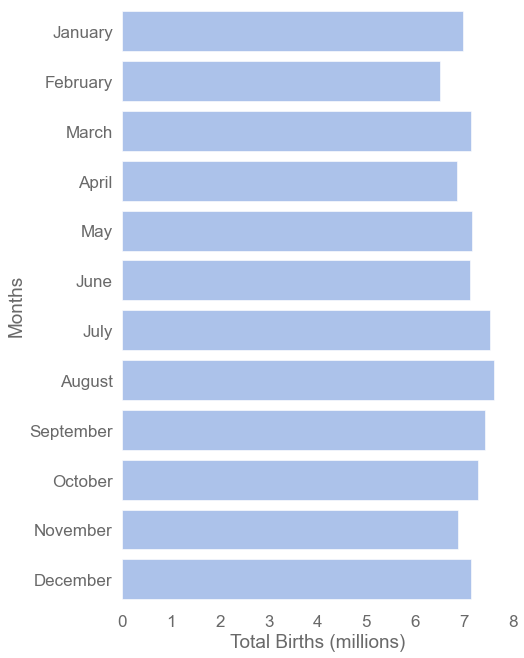

In [221]:
### Plot total births per day of the week
total_births_per_month = births.groupby(['month']).sum()
total_births_per_month.reset_index(inplace=True)
total_births_per_month['births'] = total_births_per_month.births/1000000
months_in_order=['January', 'February','March','April','May','June','July','August','September','October','November','December']
total_births_per_month = total_births_per_month.sort_values('month')

fig01, ax01 = plt.subplots(figsize=(7,11))
sns.set_theme(style="white")
sns.despine(fig=fig01, left=True, bottom=True)
sns.barplot(x="births", y="month", data=total_births_per_month, ax=ax01, orient= 'h', color='cornflowerblue', alpha=0.6)
plt.ylabel('Months', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax01.xaxis.label.set_color('dimgrey')
ax01.tick_params(axis='x', color='dimgrey')
ax01.set_yticklabels(months_in_order, fontsize=17, color='dimgrey', rotation=0)
plt.grid(False)
plt.setp(ax01.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax01.get_yticklabels(), size=17, color='dimgrey');
fig01.savefig('births_permonth.jpeg', transparent = True, bbox_inches = 'tight')

In [222]:
total_births_per_month.describe()

,month,year,day,births
count,12.000000,1.200000e+01,12.000000,12.000000
mean,6.500000,1.280890e+06,10053.583333,7.142728
std,3.605551,3.547840e+04,536.324098,0.311938
min,1.000000,1.188372e+06,8671.000000,6.511697
25%,3.750000,1.262520e+06,9765.000000,6.955535
50%,6.500000,1.304604e+06,10416.000000,7.151235
75%,9.250000,1.304604e+06,10416.000000,7.330531
max,12.000000,1.304604e+06,10416.000000,7.624626


We will now be looking at birthdays. The way I handled it is very simple:
- first I collected the top 13 most (and least) popular birthday for each year between 1994 and 2014.
- then for each birthday I summed up the births that happened between 1994 and 2014.
- finally the resulting dataframe is plotted as a calendar heatmap.

In [223]:
births_b= births[['births','year']]

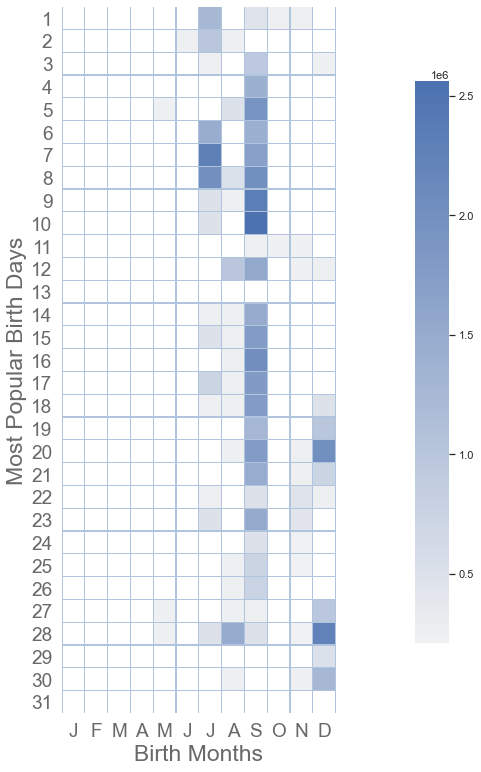

In [224]:
### Create a list spanning the range of years
year_range = np.arange(1994,2015,1)
bday_max_all=[]

### Create a dataframe with the most popular birthdays
## Fetch the top 13 most popular birthday for each year
birthday_max = pd.DataFrame()
for y in year_range:
    bmax= births_b.loc[births_b.year==y].nlargest(13, 'births')
    birthday_max = pd.concat([birthday_max,bmax])
birthday_max_date=birthday_max.index
## Enrich the list with each birthday, each year
for y in year_range:
    for bday in birthday_max_date:
        bdaydt=datetime.date(y, bday.month, bday.day)
        bday_max_all.append(bdaydt.isoformat())
## Get the births for each of these birthdays
bday_mostpop = births.loc[bday_max_all]
bday_mostpop=bday_mostpop.drop(columns=['month','day','date','day_of_week'])
## split date elements into columns
most_popular=bday_mostpop.copy()
most_popular.reset_index(inplace=True)
most_popular['month'], most_popular['day'] = most_popular.date.dt.month, most_popular.date.dt.day
most_popular = most_popular[['births','day','month']]
sorted(most_popular.month.unique())
## filling missing days and months :day missing 13 and 31, month missing 1,2,3,4
fill_day=[13,31]
fill_month=[1,2,3,4]
df_fd=pd.DataFrame(fill_day, columns=['day'])
df_fm=pd.DataFrame(fill_month, columns=['month'])
most_popular= pd.concat([most_popular,df_fd, df_fm])
most_popular= most_popular.fillna(0)
## group by month and day, sum births, and unstack to make it digestable by heatmap
mp=most_popular.groupby(['day','month']).births.sum().unstack(level=-1)
mp.drop(0.0, inplace=True)
mp.drop(columns=[0.0], inplace=True)

### Plot the heatmap (Month/day) of the most popular birthday throughout the years
fig1, ax1 = plt.subplots(figsize=(16,13))
cbar_ax1 = fig1.add_axes([.7, .2, .03, .6])
cmap1=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(mp, cmap=cmap1, square=True, linewidths=.2, linecolor='lightsteelblue', edgecolor='lightsteelblue', ax=ax1, cbar_ax=cbar_ax1)
ylabels=np.arange(1,32,1)
ax1.set_ylabel('Most Popular Birth Days', fontsize=23, color='dimgrey')
ax1.set_xlabel('Birth Months', fontsize=23, color='dimgrey')
ax1.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
ax1.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J',
                     'J',  'A',  'S',  'O',  'N',
                     'D'],
                    fontsize=19, color='dimgrey', rotation=0)
fig1.savefig('mostpopular.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

The heatcalendar of the most popular birthdays show the vast majority of popular birthday happens during the second half of the year. September seems to be the most popular birthday month.

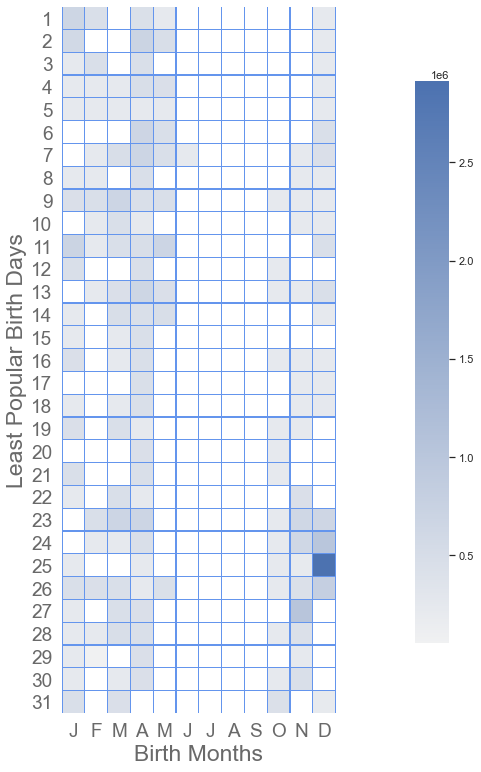

In [225]:
### Create a list spanning the range of years
year_range = np.arange(1994,2015,1)
bday_min_all=[]

### Create a dataframe with the least popular birthdays
## Fetch the top 13 least popular birthday for each year    
birthday_min = pd.DataFrame()
for y in year_range:
    bmin = births_b.loc[births_b.year==y].nsmallest(13, 'births') 
    birthday_min = pd.concat([birthday_min,bmin])
## Remove temporarily february 29 2004
birthday_min=birthday_min.drop(pd.to_datetime('2004-02-29'), inplace=False)
## Enrich the list with each birthday, each year
birthday_min_date=birthday_min.index
for y in year_range:
    for bday in birthday_min_date:
        bdaydt=datetime.date(y, bday.month, bday.day)
        bday_min_all.append(bdaydt.isoformat())
## Add 02-29 from leapyears to bday_min_all
feb29=[datetime.date(1996, 2, 29),datetime.date(2000, 2, 29),datetime.date(2004, 2, 29),
       datetime.date(2008, 2, 29),datetime.date(2012, 2, 29)]
for leap in feb29:
    bday_min_all.append(leap.isoformat())
bday_leastpop = births.loc[bday_min_all]
bday_leastpop=bday_leastpop.drop(columns=['month','day','date','day_of_week'])
## Split date elements into columns
least_popular = bday_leastpop.copy()
least_popular.reset_index(inplace=True)
least_popular['month'], least_popular['day'] = least_popular.date.dt.month, least_popular.date.dt.day
least_popular = least_popular[['births','day','month']]
## filling missing months 7,8,9
fill_month2=[7,8,9]
df_fm2=pd.DataFrame(fill_month2, columns=['month'])
least_popular= pd.concat([least_popular,df_fm2])
least_popular= least_popular.fillna(0)
## group by month and day, sum births, and unstack to make it digestable by heatmap
lp=least_popular.groupby(['day','month']).births.sum().unstack(level=-1)
lp.drop(0.0, inplace=True)
lp.fillna(1)

### Plot the heatmap or heatcalendar of least popular birthdays
fig2, ax2 = plt.subplots(figsize=(16,13))
cbar_ax2 = fig2.add_axes([.7, .2, .03, .6])
cmap2=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(lp, cmap = cmap2, square=True, linewidths=.2, linecolor='cornflowerblue', edgecolor='cornflowerblue', ax=ax2, cbar_ax=cbar_ax2)
ylabels=np.arange(1,32,1)
ax2.set_ylabel('Least Popular Birth Days', fontsize=23, color='dimgrey')
ax2.set_xlabel('Birth Months', fontsize=23, color='dimgrey')
ax2.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
ax2.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J', 'J',  'A',  'S',  'O',  'N', 'D'],
                   fontsize=19, color='dimgrey', rotation=0)
fig2.savefig('leastpopular.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()


The least popular birthdays can be summarized as "not happening in Summer'. Interestingly christmas (12/25) showed one of the lowest daily births for some years, but when cumulated over 21 years it turns out to be a popular birthday.

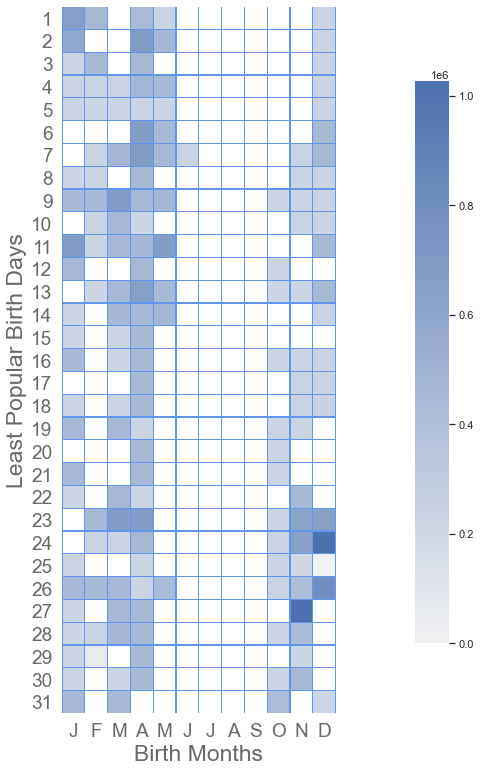

In [226]:
### Plot the heatmap (Month/day) of the least popular birthday throughout the years 

## remove christmas
lp_minusXM=lp.copy()
lp_minusXM.loc[25,12]=0
## Plot the heatmap
fig2b, ax2b = plt.subplots(figsize=(16,13))
cbar_ax2b = fig2b.add_axes([.7, .2, .03, .6])
cmap2b=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(lp_minusXM, cmap = cmap2b, square=True, linewidths=.2, linecolor='cornflowerblue', edgecolor='cornflowerblue', ax=ax2b, cbar_ax=cbar_ax2b)
ylabels=np.arange(1,32,1)

#ax1.set_facecolor('white')
ax2b.set_ylabel('Least Popular Birth Days', fontsize=23, color='dimgrey')
ax2b.set_xlabel('Birth Months', fontsize=23, color='dimgrey')
ax2b.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
ax2b.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J', 'J',  'A',  'S',  'O',  'N', 'D'],
                   fontsize=19, color='dimgrey', rotation=0)
#ax2.set_title('LeastPopular Birthdays (1994-2014)', fontsize=15, color='dimgrey')
fig2b.savefig('leastpopular_minusXM.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

Once christmas is removed from the least popular birthdays, the picture is clearer. We can see that christmas eve (12/24) and the Thanksgiving period (the 4th Thrusday of November) come second and third in the highest birth rates within the unpopular birthdays. The month with the less popular birthdays are found in January, February and March.
My birthday, March 13th, turned out to be an unpopular birthday with an average birth count for its category. Let's see how the birth count on March 13th looks like on a time series.

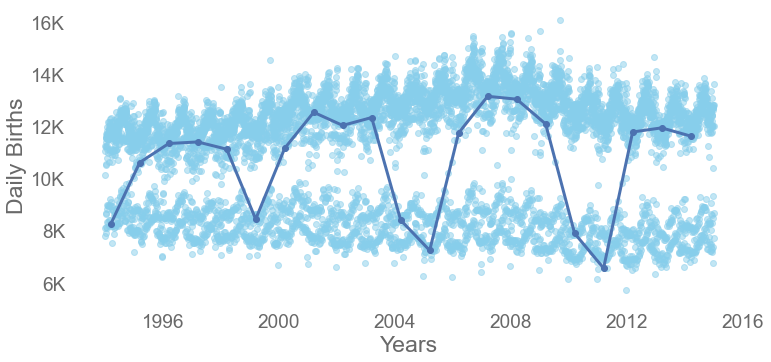

In [227]:
### Fetch the births on March 13th
## first make a list of March 13th date
march13th = []
for y in year_range:
    march13th.append(str(y)+'-03-13')
## Fetch the births     
birthday_me = pd.DataFrame()
for y in march13th:
    bme = births_b.loc[y] 
    birthday_me = pd.concat([birthday_me,bme])
    

### Fetch the 13th birthday on Friday 13th
# List the years during which the 13th birthday will occur
year_range_13 = year_range+13
### Plot the March 13th time series
figM13, axM13 = plt.subplots(figsize=[12,5])
figM13.subplots_adjust(top=0.95, wspace=0.5)
sns.despine(top=True, bottom=True, left=True, right=True, ax=axM13)
axM13.plot(births_b.births, marker='o', linestyle= 'None', alpha=0.5, color='skyblue')
axM13.plot(birthday_me.births, marker='o', linestyle= '-', linewidth=3)
axM13.set_ylabel('Daily Births', fontsize=23, color='dimgrey')
axM13.set_xlabel('Years', fontsize=23, color='dimgrey')
axM13.set_yticklabels(['4K','6K','8K','10K','12K','14K', '16K'],color='dimgrey', fontsize=19)
axM13.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=19, color='dimgrey');
figM13.savefig('mybirthdaythroughtime.jpeg', transparent = True, bbox_inches = 'tight')

In [228]:
### total people born on march 13th
birthday_me.births.sum()

224642

For the numbers: 224,642 babies were born on March 13th between 1994 and 2014.
The 'March 13th' time series plot shows an interesting cyclicity. The birth rate on March 13th tends to drop dramatically (-6,000) every five years. We can see also a cyclicity in the most popular birthdays (upper group from 11k to 16k births) and the least popular birthdays (lower group from 7k to 11k).

As shown below the cyclicity has nothing to do with superstition (i.e. falling on a Friday) but it tied to a fact we have seen earlier: birth happens more likely during the week (babies hate weekends). A given birthday records less births if it falls on a Saturday or Sunday.

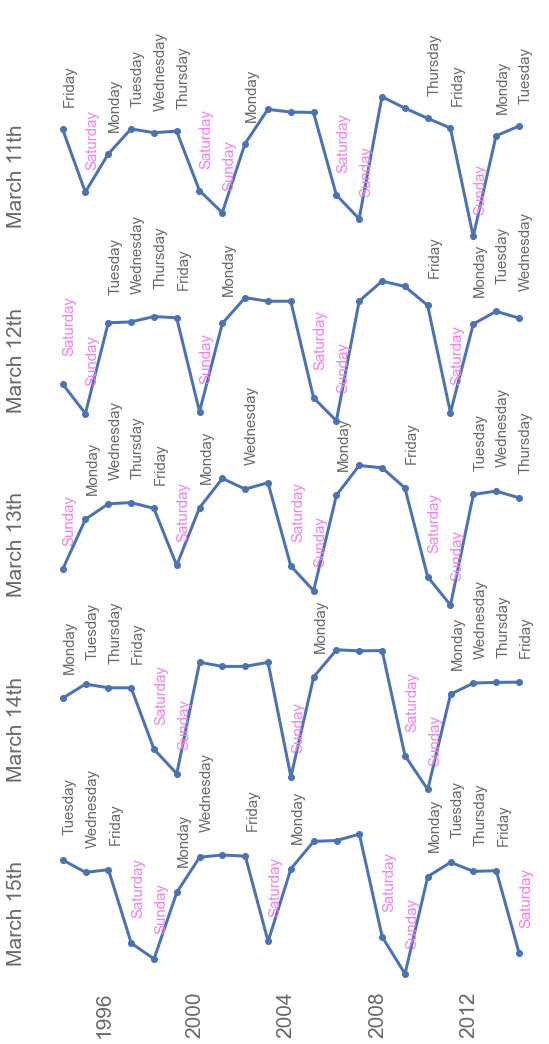

In [229]:
### Fetch the births on March 11th,12th,13th,14,15th
## make a list of March 11th date
march11th = []
for y in year_range:
    march11th.append(str(y)+'-03-11')
# Fetch the births     
birthday_11 = pd.DataFrame()
for y in march11th:
    bme11 = births_b.loc[y] 
    birthday_11 = pd.concat([birthday_11,bme11])
## make a list of March 12th date
march12th = []
for y in year_range:
    march12th.append(str(y)+'-03-12')
# Fetch the births     
birthday_12 = pd.DataFrame()
for y in march12th:
    bme12 = births_b.loc[y] 
    birthday_12 = pd.concat([birthday_12,bme12])                            
## make a list of March 13th date
march13th = []
for y in year_range:
    march13th.append(str(y)+'-03-13')
# Fetch the births     
birthday_13 = pd.DataFrame()
for y in march13th:
    bme13 = births_b.loc[y] 
    birthday_13 = pd.concat([birthday_13,bme13])
## make a list of March 14th date
march14th = []
for y in year_range:
    march14th.append(str(y)+'-03-14')
# Fetch the births     
birthday_14 = pd.DataFrame()
for y in march14th:
    bme14 = births_b.loc[y] 
    birthday_14 = pd.concat([birthday_14,bme14])
## make a list of March 15th date
march15th = []
for y in year_range:
    march15th.append(str(y)+'-03-15')
# Fetch the births     
birthday_15 = pd.DataFrame()
for y in march15th:
    bme15 = births_b.loc[y] 
    birthday_15 = pd.concat([birthday_15,bme15])
       

### Fetch the 13th birthday on Friday 13th
# List the years during which the 13th birthday will occur
year_range_13 = year_range+13
adjust=1300
fontsz=15
### Plot the  time series
fig13, (ax11,ax12,ax13,ax14,ax15) = plt.subplots(5,1,figsize=[9,9], sharex=True)
fig13.subplots_adjust(top=1.5, wspace=1.5)

sns.despine(top=True, bottom=True, left=True, right=True, ax=ax11)
for i,j in birthday_11.births.items():
    day=calendar.day_name[i.weekday()]
    if day in ['Saturday','Sunday']:
        ax11.annotate(day, xy=(i, j+adjust), rotation=90, color='violet', fontsize=fontsz)
    else:
        ax11.annotate(day, xy=(i, j+adjust), rotation=90, color='dimgrey', fontsize=fontsz)
ax11.plot(birthday_11.births, marker='o', linestyle= '-', linewidth=3)
ax11.set_ylabel('March 11th   ', fontsize=21, color='dimgrey',rotation=90)
ax11.set_yticklabels(['','','','','','', ''],color='dimgrey', fontsize=19)
ax11.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=19, color='dimgrey');

sns.despine(top=True, bottom=True, left=True, right=True, ax=ax12)
for i,j in birthday_12.births.items():
    day=calendar.day_name[i.weekday()]
    if day in ['Saturday','Sunday']:
        ax12.annotate(day, xy=(i, j+adjust), rotation=90, color='violet', fontsize=fontsz)
    else:
        ax12.annotate(day, xy=(i, j+adjust), rotation=90, color='dimgrey', fontsize=fontsz)
ax12.plot(birthday_12.births, marker='o', linestyle= '-', linewidth=3)
ax12.set_ylabel('March 12th   ', fontsize=21, color='dimgrey',rotation=90)
ax12.set_yticklabels(['','','','','','', ''],color='dimgrey', fontsize=19)
ax12.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=19, color='dimgrey');

sns.despine(top=True, bottom=True, left=True, right=True, ax=ax13)
for i,j in birthday_13.births.items():
    day=calendar.day_name[i.weekday()]
    if day in ['Saturday','Sunday']:
        ax13.annotate(day, xy=(i, j+adjust), rotation=90, color='violet', fontsize=fontsz)
    else:
        ax13.annotate(day, xy=(i, j+adjust), rotation=90, color='dimgrey', fontsize=fontsz)
ax13.plot(birthday_13.births, marker='o', linestyle= '-', linewidth=3)
ax13.set_ylabel('March 13th   ', fontsize=21, color='dimgrey',rotation=90)
ax13.set_yticklabels(['','','','','','', ''],color='dimgrey', fontsize=19)
ax13.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=19, color='dimgrey');

sns.despine(top=True, bottom=True, left=True, right=True, ax=ax14)
for i,j in birthday_14.births.items():
    day=calendar.day_name[i.weekday()]
    if day in ['Saturday','Sunday']:
        ax14.annotate(day, xy=(i, j+adjust), rotation=90, color='violet', fontsize=fontsz)
    else:
        ax14.annotate(day, xy=(i, j+adjust), rotation=90, color='dimgrey', fontsize=fontsz)
ax14.plot(birthday_14.births, marker='o', linestyle= '-', linewidth=3)
ax14.set_ylabel('March 14th   ', fontsize=21, color='dimgrey',rotation=90)
ax14.set_yticklabels(['','','','','','', ''],color='dimgrey', fontsize=19)
ax14.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=19, color='dimgrey');

sns.despine(top=True, bottom=True, left=True, right=True, ax=ax15)
for i,j in birthday_15.births.items():
    day=calendar.day_name[i.weekday()]
    if day in ['Saturday','Sunday']:
        ax15.annotate(day, xy=(i, j+adjust), rotation=90, color='violet', fontsize=fontsz)
    else:
        ax15.annotate(day, xy=(i, j+adjust), rotation=90, color='dimgrey', fontsize=fontsz)
ax15.plot(birthday_15.births, marker='o', linestyle= '-', linewidth=3)
ax15.set_ylabel('March 15th   ', fontsize=21, color='dimgrey', rotation=90)
ax15.set_xlabel('', fontsize=17, color='dimgrey')
ax15.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=21, color='dimgrey', rotation=90);
ax15.set_yticklabels(['','','','','','', ''],color='dimgrey', fontsize=12)
fig13.savefig('cyclebirthday.jpeg', transparent = True, bbox_inches = 'tight')

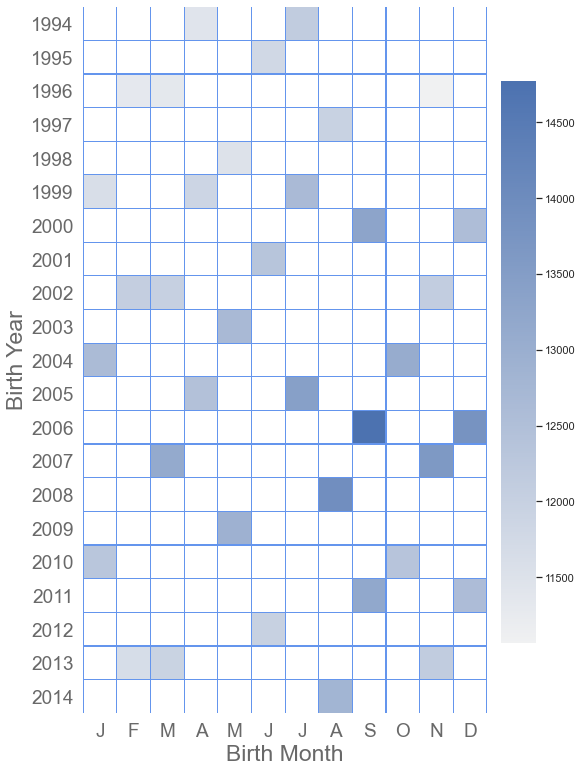

In [230]:
### See the birthday of kids born between 1994 and 2014 who have celebrated or
### will celebrate their 13th birthday on a Friday
## collect the 13th birthday date that falls on a Friday
b13th_dates=[]
for year in year_range_13:
        for month in range(1, 13):
            thirteenth = date(year, month, 13)
            # Ensure that the 13th is a Friday.
            if thirteenth.weekday() == 4:
                b13th_dates.append(thirteenth.isoformat())
## save the data in a VIP dataframe               
vip_club = pd.DataFrame()
vip_club = pd.DataFrame(b13th_dates) 
## work back to the initial birth date
vip_club.rename(columns={0:'thirteenth_birthday'}, inplace=True)
vip_club.thirteenth_birthday = vip_club.thirteenth_birthday.astype('datetime64[ns]')
vip_club['birthday_year'], vip_club['birthday_month'] = vip_club['thirteenth_birthday'].dt.year, vip_club['thirteenth_birthday'].dt.month
vip_club['birth_year'] = vip_club['birthday_year']-13
vip_club['birth_date'] =vip_club.birth_year.astype('str')+vip_club.birthday_month.astype('str')+'13'
## fixing january to 01 otherwise it will be turned into november by datetime
vip_club.loc[vip_club.birth_date=='1999113']='19990113'
vip_club.loc[vip_club.birth_date=='2004113']='20040113'
vip_club.loc[vip_club.birth_date=='2010113']='20100113'
## converting to datetime format
vip_club['birth_date'] = pd.to_datetime(vip_club['birth_date'], format='%Y%m%d')

### Fetch the births for each birth_date
vip_club_births = births_b.loc[vip_club.birth_date]
vip_club_births
## split date elements into columns
vp = vip_club_births.copy()
vp.reset_index(inplace=True)
vp['month'], vp['year'] = vp.date.dt.month, vp.date.dt.year
vp = vp[['births','year','month']]
vp= vp.fillna(0)
## group by month and year, sum births, and unstack to make it digestable by heatmap
vpg=vp.groupby(['year','month']).births.sum().unstack(level=-1)
vpg.fillna(1)

### Plot the VIP13 heatmap  
figvip, axvip = plt.subplots(figsize=(16,13))
cbar_axvip = figvip.add_axes([.7, .2, .03, .6])
cmapvip=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(vpg, cmap = cmapvip, square=True, linewidths=.2, linecolor='cornflowerblue', edgecolor='cornflowerblue', ax=axvip, cbar_ax=cbar_axvip)
ylabels=np.arange(1994,2015,1)
axvip.set_ylabel('Birth Year', fontsize=23, color='dimgrey')
axvip.set_xlabel('Birth Month', fontsize=23, color='dimgrey')
axvip.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
axvip.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J', 'J',  'A',  'S',  'O',  'N', 'D'],
                      fontsize=19, color='dimgrey', rotation=0)
figvip.savefig('vipclub.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

In [231]:
### number of children that will celabrate their 13th birthday on a Friday
cel13th=vpg.sum().sum()
cel13th

460584.0

In [232]:
### percentage of the population that will celabrate their 13th birthday on a Friday
pct_babies = cel13th/85712738*100
round(pct_babies,1)

0.5

In [233]:
### vip_club members born on March 13th
m13=vpg.copy()
m13=m13.drop(columns=[1,2,4,5,6,7,8,9,10,11,12], inplace=False)
m13_sum=m13.sum()
m13_sum

month
3    48453.0
dtype: float64

In [234]:
### percentage of the babies that will celabrate their 13th birthday on a Friday and were born on March 13th
pct_babies_m13 = m13_sum/85712738*100
round(pct_babies_m13,2)

month
3    0.06
dtype: float64

The VIP Club from 1994 to 2014:
- 460,584 americans have celebrated or will celebrate their 13th birthday on a Friday 13th. This represent 0.5% of the 85.7 millions babies born between 1994 and 2014.
- 48,453 americans were  born on March 13th. This represent 0.06% of the 85.7 millions babies born between 1994 and 2014.
- Note that March 13th 2013 fell on a Wednesday.

### 4. Summary & The Powerpoint Presentation ###
**U.S. Birth data from 1994 to 2014 showed:**
- About 4 million births per year.
- Birth is more likely to happen on weekdays than weekends.
- Most births happen in Summer. The most popular birth month is September. 
- Xmas is a cumulative popular birthday, though it falls in the unpopular birthday when looking at individual years.

**March 13th:**
- March 13th births time series shows cyclicity. 
- Every 5 years births drop to unpopular rates.
- The drop happens on weekends.
- 224,642 americans were born on March 13th between 1994 and 2014.

**VIP Club, born on a 13th:**
- Almost ½ a million americans were born on 13th between 1994 and 2014 and have celebrated or will celebrate their 13th birthday on a Friday. This represents 0.5% of the babies born between 1994 and 2014.
- Among them 48,453 were born on March 13th. This represents 0.06% of the babies born between 1994 and 2014.

"Popular_Birthdays" is a powerpoint presentation available in the folder that presents this notebook in a more formal manner.